# Linear Regression Machine Learning Project for House Price Prediction

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

### Importing Data and Checking out.

In [2]:
HouseDF = pd.read_csv('Housing_Dataset.csv')

In [3]:
HouseDF.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [4]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              17 non-null     float64
 1   Avg. Area House Age           17 non-null     float64
 2   Avg. Area Number of Rooms     17 non-null     float64
 3   Avg. Area Number of Bedrooms  17 non-null     float64
 4   Area Population               17 non-null     float64
 5   Price                         17 non-null     float64
 6   Address                       17 non-null     object 
dtypes: float64(6), object(1)
memory usage: 1.1+ KB


In [5]:
HouseDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01
mean,69058.800035,5.918053,7.177041,3.737059,35689.426506,1.233814e+06
std,12215.504282,1.093274,1.101687,1.020072,9201.886684,3.285782e+05
min,39033.809237,4.423672,5.042747,2.270000,23086.800503,6.309435e+05
25%,61287.067179,5.067890,6.393121,3.100000,29387.396003,1.058988e+06
50%,73091.866746,5.682861,7.250029,4.010000,35521.294033,1.291332e+06
75%,79545.458574,6.919535,8.167688,4.230000,39717.813576,1.505891e+06
max,81885.927184,8.093513,8.517513,6.100000,60828.249085,1.707046e+06


In [6]:
HouseDF.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Exploratory Data Analysis for House Price Prediction

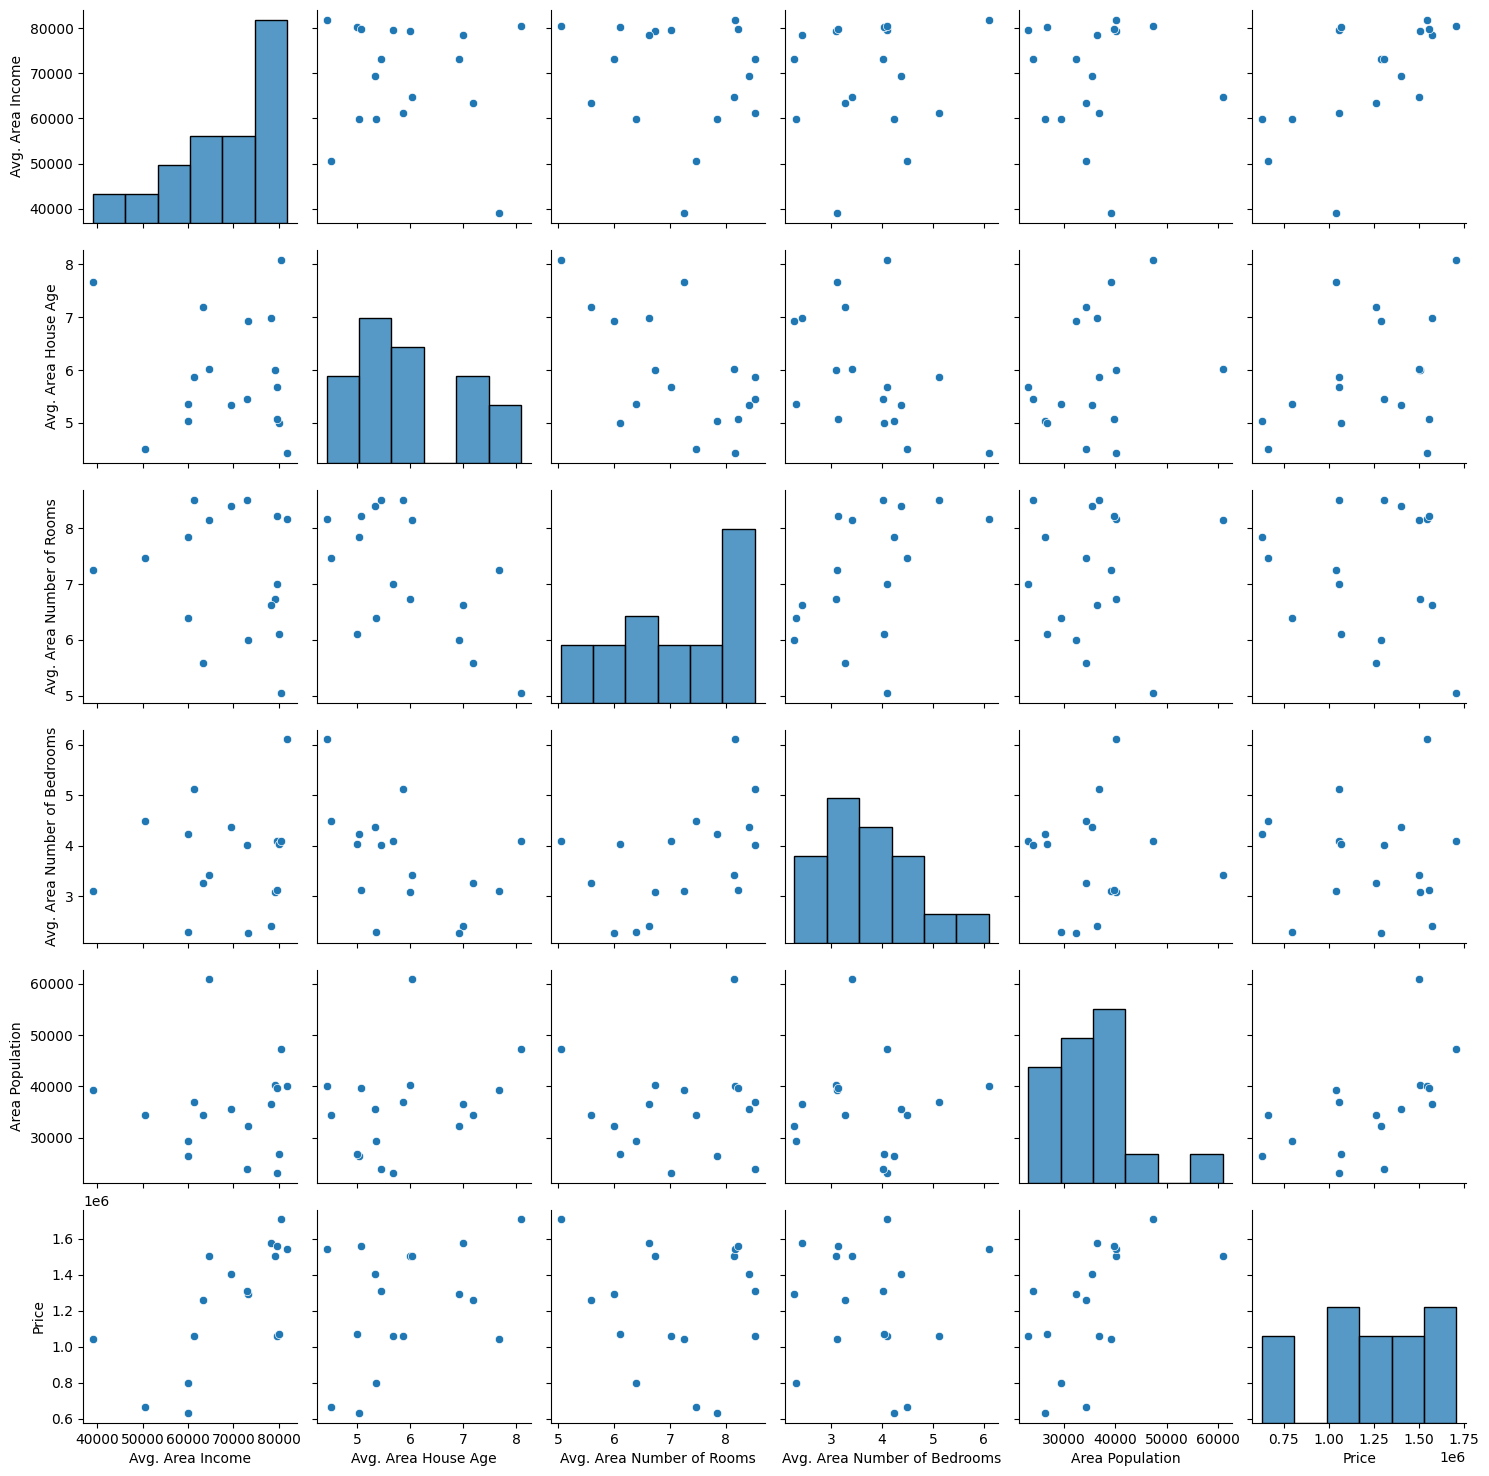

In [7]:
sns.pairplot(HouseDF)

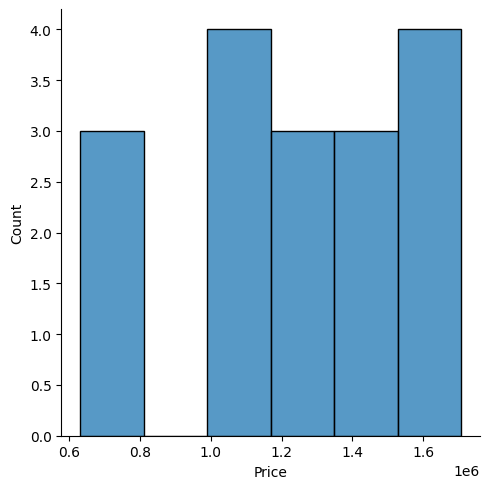

In [8]:
sns.displot(HouseDF['Price'])

In [9]:
# sns.heatmap(HouseDF.corr(), annot=True)

## Training a Linear Regression Model

### X and y List

In [10]:
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = HouseDF['Price']

### Split Data into Train, Test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the LinearRegression Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

## LinearRegression Model Evaluation

In [16]:
print(lm.intercept_)

-2014579.9585824977


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,25.757080
Avg. Area House Age,72839.907856
Avg. Area Number of Rooms,57481.009666
Avg. Area Number of Bedrooms,-19571.843457
Area Population,17.899894


## Predictions from our Linear Regression Model

In [18]:
predictions = lm.predict(X_test)

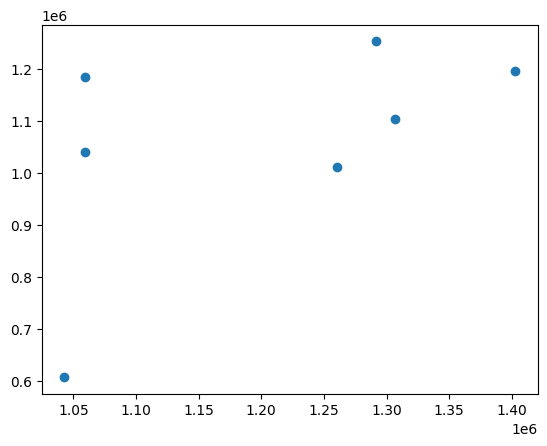

In [19]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

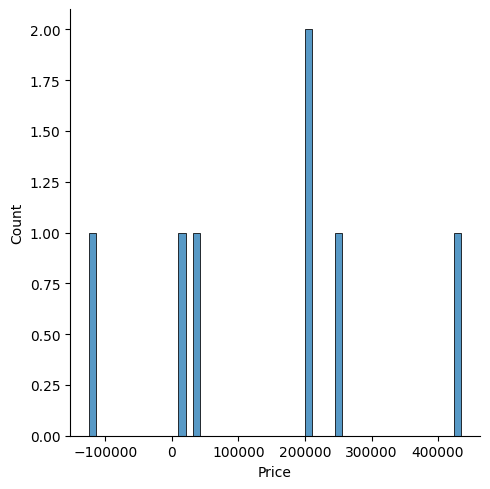

In [20]:
sns.displot((y_test-predictions),bins=50);

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

## Regression Evaluation Metrics

In [21]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 182312.07801910437
MSE: 50378508805.1593
RMSE: 224451.57340762686


In [28]:
def adjusted_r2(r2, n, p):
    return 1 - ((1-r2)*(n-1)/(n-p-1))

In [29]:
r2 = lm.score(X,y)
print("r2 = ", r2)

n = HouseDF.shape[0]
p = HouseDF.shape[1] - 1
adj_r2 = adjusted_r2(r2, n, p)

print("adjusted r2 = ", adj_r2)

r2 =  0.7693326400416367
adjusted r2 =  0.6309322240666188
